In [1]:
import pandas as pd 
df=pd.read_csv("/home/idisc02/Downloads/sofRec-main/src/labeled_amazon.csv")

/tmp/ipykernel_326019/2395722172.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/home/idisc02/Downloads/sofRec-main/src/labeled_amazon.csv")


In [2]:
#df=df.head(10000)

In [3]:
#Importing libraries for feature engineering
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/idisc02/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Defining text cleaning function
def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    text = re.sub(r'amp','',text)
    text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z0-9]', ' ', 
           text.strip().lower())).strip()
    text = [word for word in text.split() if word not in forbidden_words]
    return ' '.join(text)

In [5]:
df['ensemble'] = df['ensemble'].apply(str)

In [6]:
df.head()

,Unnamed: 0,verified,overall,reviewTime,reviewerID,reviewText,category,description,title,brand,feature,price,software_category,Licensing_Fee,Implemention_cost,Maintenance_cost,label,ensemble
0,0,False,5.0,"07 23, 2008",A8IOST6U6WH9B,Human Japanese is a truly superb introduction ...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
1,1,False,5.0,"06 4, 2008",A1MUV9F35OROS5,I got Human Japanese as a demo from its websit...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
2,2,False,4.0,"04 8, 2008",A27PAMABWVQ892,My first experience with Human Japanese was th...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,negative,Human Japanese['<DIV>Human Japanese is softwar...
3,3,False,5.0,"03 26, 2008",A3HWWVK0L3JEKF,This is the first language software that I hav...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
4,4,False,5.0,"02 20, 2008",A3NO2V2JU4Y8UY,Human japanese is the best pc program for lear...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...


In [7]:
#Applying text cleaning function to each row
df['ensemble'] = df['ensemble'].apply(lambda text: text_cleaning(text))

#Printing line at Index 10000
df['ensemble']

0         human japanese div human japanese software win...
1         human japanese div human japanese software win...
2         human japanese div human japanese software win...
3         human japanese div human japanese software win...
4         human japanese div human japanese software win...
                                ...                        
145858                                                  nan
145859                                                  nan
145860                                                  nan
145861                                                  nan
145862                                                  nan
Name: ensemble, Length: 145863, dtype: object

In [8]:
df["software_category"]

0         Education & Reference
1         Education & Reference
2         Education & Reference
3         Education & Reference
4         Education & Reference
                  ...          
145858                      NaN
145859                      NaN
145860                      NaN
145861                      NaN
145862                      NaN
Name: software_category, Length: 145863, dtype: object

In [9]:
df=df.head(20000)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_metrix = CV.fit_transform(df['ensemble'])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_metrix = CV.fit_transform(df['reviewText'])

In [10]:
converted_metrix

<50000x33180 sparse matrix of type '<class 'numpy.int64'>'
	with 1960053 stored elements in Compressed Sparse Row format>

In [ ]:
cosine_similarity = cosine_similarity(converted_metrix)

In [10]:
df= df.dropna()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Prepare your data
 
  

# Step 2: Perform text preprocessing (e.g., cleaning, tokenization, stemming/lemmatization)

# Step 3: Convert text to numerical representation

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ensemble'])

# Step 4: Calculate cosine similarity

cosine_sim = cosine_similarity(X)

# Step 5: Build the recommendation system

target_item_index = 0  # Index of the item you want to recommend similar items for

scores = list(enumerate(cosine_sim[target_item_index]))
scores = sorted(scores, key=lambda x: x[1], reverse=True)

top_n = 5  # Number of top recommendations to consider
top_recommendations = scores[1:top_n+1]

for item_index, score in top_recommendations:
    recommended_item_label = df["label"][item_index]
    recommended_item_price = df["price"][item_index]
    print(f"Recommended: {recommended_item_label} (Price: {recommended_item_price})")


Recommended: positive (Price: 39.94)
Recommended: positive (Price: 39.94)
Recommended: positive (Price: 39.94)
Recommended: positive (Price: 39.94)
Recommended: positive (Price: 39.94)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

 

# Step 3: Convert text to numerical representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ensemble'])

# Step 4: Calculate cosine similarity
cosine_sim = cosine_similarity(X)

# Step 5: Build the recommendation system
target_item_index = 0  # Index of the item you want to recommend similar items for

scores = list(enumerate(cosine_sim[target_item_index]))
scores = sorted(scores, key=lambda x: x[1], reverse=True)

top_n = 10  # Number of top recommendations to consider
top_recommendations = scores[1:top_n+1]

for item_index, score in top_recommendations:
    recommended_item_label = df["label"][item_index]
    recommended_item_price = df["price"][item_index]
    recommended_item_licensing_fee = df["Licensing_Fee"][item_index]
    recommended_item_implementation_cost = df["Implemention_cost"][item_index]
    recommended_item_maintenance_cost = df["Maintenance_cost"][item_index]

    print(f"Recommended: {recommended_item_label}")
    print(f"Price: {recommended_item_price}")
    print(f"Licensing Fee: {recommended_item_licensing_fee}")
    print(f"Implementation Cost: {recommended_item_implementation_cost}")
    print(f"Maintenance Cost: {recommended_item_maintenance_cost}")
    print()

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price: 39.94
Licensing Fee: 0.008
Implementation Cost: 19.97
Maintenance Cost: 3.994

Recommended: positive
Price:

In [17]:
import numpy as np

In [18]:
count_ratings = [0 for i in range(len(np.unique(df['overall'])))]
print("Number of Unique Ratings available : ",len(count_ratings))

Number of Unique Ratings available :  5


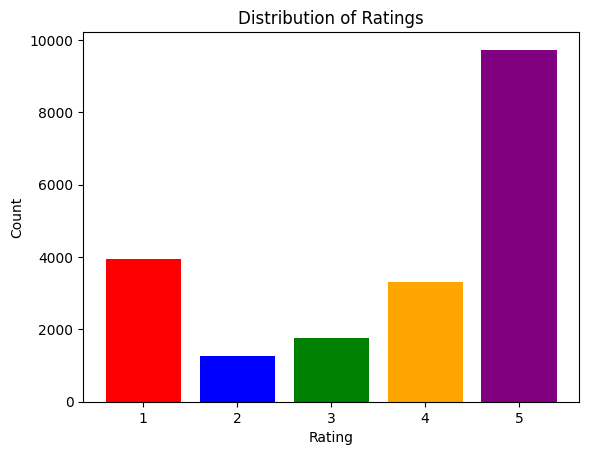

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
count_ratings = [0] * 5

for i in range(df.shape[0]):
    rating = int(df['overall'].iloc[i] - 1)
    if rating >= 0 and rating < 5:
        count_ratings[rating] += 1

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.bar(range(1, 6), count_ratings, color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [21]:
 df.shape

(20000, 18)

In [22]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df' is your DataFrame containing 'overall', 'price', 'Licensing_Fee', 'Implementation_cost', and 'Maintenance_cost' columns

# Normalize the 'overall', 'price', 'Licensing_Fee', 'Implementation_cost', and 'Maintenance_cost' columns
df['normalized_overall'] = df['overall'] / df['overall'].max()
df['normalized_price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df['normalized_licensing_fee'] = (df['Licensing_Fee'] - df['Licensing_Fee'].min()) / (df['Licensing_Fee'].max() - df['Licensing_Fee'].min())
df['normalized_implementation_cost'] = (df['Implemention_cost'] - df['Implemention_cost'].min()) / (df['Implemention_cost'].max() - df['Implemention_cost'].min())
df['normalized_maintenance_cost'] = (df['Maintenance_cost'] - df['Maintenance_cost'].min()) / (df['Maintenance_cost'].max() - df['Maintenance_cost'].min())

# Define the features to be used for similarity calculation
features = ['normalized_overall', 'normalized_price', 'normalized_licensing_fee', 'normalized_implementation_cost', 'normalized_maintenance_cost']
item_features = df[features].values

# Assuming 'user_id' is the ID of the user for whom you want to make recommendations
user_id = 'A2ZXAVA5M0RCEG'
user_ratings = df[df['reviewerID'] == user_id][features].values[0]

# Calculate the similarity scores between the user and all items
similarity_scores = cosine_similarity(user_ratings.reshape(1, -1), item_features)

# Flatten the similarity scores and find the indices of top recommendations
recommendations = similarity_scores.flatten().argsort()[::-1]

# Print the recommended products
print("Recommended Products:")
for item_id in recommendations:
    if item_id != user_id:
         
        print("Product Name:", df.iloc[item_id]['title'])
        print("Similarity Score:", similarity_scores[0][item_id])
        print("Price:", df.iloc[item_id]['price'])
        print("Licensing Fee:", df.iloc[item_id]['Licensing_Fee'])
        print("Implementation Cost:", df.iloc[item_id]['Implemention_cost'])
        print("Maintenance Cost:", df.iloc[item_id]['Maintenance_cost'])
        print()

Recommended Products:
Product Name: WordPerfect Office X7 Home and Student [Old Version]
Similarity Score: 1.0000000000000002
Price: 69.98
Licensing Fee: 0.008
Implementation Cost: 34.99
Maintenance Cost: 6.998000000000001

Product Name: WordPerfect Office X7 Home and Student [Old Version]
Similarity Score: 1.0000000000000002
Price: 69.98
Licensing Fee: 0.008
Implementation Cost: 34.99
Maintenance Cost: 6.998000000000001

Product Name: WordPerfect Office X7 Home and Student [Old Version]
Similarity Score: 1.0000000000000002
Price: 69.98
Licensing Fee: 0.008
Implementation Cost: 34.99
Maintenance Cost: 6.998000000000001

Product Name: WordPerfect Office X7 Home and Student [Old Version]
Similarity Score: 1.0000000000000002
Price: 69.98
Licensing Fee: 0.008
Implementation Cost: 34.99
Maintenance Cost: 6.998000000000001

Product Name: WordPerfect Office X7 Home and Student [Old Version]
Similarity Score: 1.0000000000000002
Price: 69.98
Licensing Fee: 0.008
Implementation Cost: 34.99
Maint

Price: 60.38
Licensing Fee: 0.008
Implementation Cost: 30.19
Maintenance Cost: 6.038

Product Name: Reader Rabbit Personalized Kindergarten (2 CDs)
Similarity Score: 0.9999819125598497
Price: 15.95
Licensing Fee: 0.008
Implementation Cost: 7.975
Maintenance Cost: 1.595

Product Name: Reader Rabbit Personalized Kindergarten (2 CDs)
Similarity Score: 0.9999819125598497
Price: 15.95
Licensing Fee: 0.008
Implementation Cost: 7.975
Maintenance Cost: 1.595

Product Name: Reader Rabbit Personalized Kindergarten (2 CDs)
Similarity Score: 0.9999819125598497
Price: 15.95
Licensing Fee: 0.008
Implementation Cost: 7.975
Maintenance Cost: 1.595

Product Name: Reader Rabbit Personalized Kindergarten (2 CDs)
Similarity Score: 0.9999819125598497
Price: 15.95
Licensing Fee: 0.008
Implementation Cost: 7.975
Maintenance Cost: 1.595

Product Name: Reader Rabbit Personalized Kindergarten (2 CDs)
Similarity Score: 0.9999819125598497
Price: 15.95
Licensing Fee: 0.008
Implementation Cost: 7.975
Maintenance Co

Product Name: Learn Spanish with OUINO: The 5-in-1 Complete Collection (for PC, Mac, iPad, Android, Chromebook) - Redesigned &amp; Expanded v3
Similarity Score: 0.9998507114534891
Price: 97.95
Licensing Fee: 0.008
Implementation Cost: 48.975
Maintenance Cost: 9.795000000000002

Product Name: Learn Spanish with OUINO: The 5-in-1 Complete Collection (for PC, Mac, iPad, Android, Chromebook) - Redesigned &amp; Expanded v3
Similarity Score: 0.9998507114534891
Price: 97.95
Licensing Fee: 0.008
Implementation Cost: 48.975
Maintenance Cost: 9.795000000000002

Product Name: Learn Spanish with OUINO: The 5-in-1 Complete Collection (for PC, Mac, iPad, Android, Chromebook) - Redesigned &amp; Expanded v3
Similarity Score: 0.9998507114534891
Price: 97.95
Licensing Fee: 0.008
Implementation Cost: 48.975
Maintenance Cost: 9.795000000000002

Product Name: Learn Spanish with OUINO: The 5-in-1 Complete Collection (for PC, Mac, iPad, Android, Chromebook) - Redesigned &amp; Expanded v3
Similarity Score: 0.

Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9997557214432725
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9997557214432725
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9997557214432725
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9997557214432725
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9997557214432725
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9997557214432725
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
S

Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee: 0.008
Implementation Cost: 13.705
Maintenance Cost: 2.741

Product Name: iWork '09
Similarity Score: 0.9996529736795178
Price: 27.41
Licensing Fee

Price: 18.99
Licensing Fee: 0.008
Implementation Cost: 9.495
Maintenance Cost: 1.899

Product Name: Apple iWork '08 Family Pack [OLD VERSION]
Similarity Score: 0.9995020072748761
Price: 18.99
Licensing Fee: 0.008
Implementation Cost: 9.495
Maintenance Cost: 1.899

Product Name: MacKiev 10579 World Book Encyclopedia 2008 - Macintosh
Similarity Score: 0.9995020072748761
Price: 18.99
Licensing Fee: 0.008
Implementation Cost: 9.495
Maintenance Cost: 1.899

Product Name: Apple iWork '08 Family Pack [OLD VERSION]
Similarity Score: 0.9995020072748761
Price: 18.99
Licensing Fee: 0.008
Implementation Cost: 9.495
Maintenance Cost: 1.899

Product Name: Apple iWork '08 Family Pack [OLD VERSION]
Similarity Score: 0.9995020072748761
Price: 18.99
Licensing Fee: 0.008
Implementation Cost: 9.495
Maintenance Cost: 1.899

Product Name: Apple iWork '08 Family Pack [OLD VERSION]
Similarity Score: 0.9995020072748761
Price: 18.99
Licensing Fee: 0.008
Implementation Cost: 9.495
Maintenance Cost: 1.899

Produc

Price: 9.98
Licensing Fee: 0.008
Implementation Cost: 4.99
Maintenance Cost: 0.998

Product Name: Individual Software Anytime Organizer Deluxe 14
Similarity Score: 0.9993103312028294
Price: 9.98
Licensing Fee: 0.008
Implementation Cost: 4.99
Maintenance Cost: 0.998

Product Name: Individual Software Anytime Organizer Deluxe 14
Similarity Score: 0.9993103312028294
Price: 9.98
Licensing Fee: 0.008
Implementation Cost: 4.99
Maintenance Cost: 0.998

Product Name: Elementary Advantage 2012 AMR
Similarity Score: 0.9993101011619305
Price: 9.97
Licensing Fee: 0.008
Implementation Cost: 4.985
Maintenance Cost: 0.997

Product Name: Elementary Advantage 2012 AMR
Similarity Score: 0.9993101011619305
Price: 9.97
Licensing Fee: 0.008
Implementation Cost: 4.985
Maintenance Cost: 0.997

Product Name: Elementary Advantage 2012 AMR
Similarity Score: 0.9993101011619305
Price: 9.97
Licensing Fee: 0.008
Implementation Cost: 4.985
Maintenance Cost: 0.997

Product Name: Elementary Advantage 2012 AMR
Similari

Product Name: Crack the NBDE - Simulate the National Board Dental Examination Part 1 (2019-2020 Deluxe Edition Prep Pack) [Digital Download]
Similarity Score: 0.9987864684431405
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Crack the NBDE - Simulate the National Board Dental Examination Part 1 (2019-2020 Deluxe Edition Prep Pack) [Digital Download]
Similarity Score: 0.9987864684431405
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Microsoft Office Home and Student 2007 [Old Version]
Similarity Score: 0.9987864684431405
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Crack the NBDE - Simulate the National Board Dental Examination Part 1 (2019-2020 Deluxe Edition Prep Pack) [Digital Download]
Similarity Score: 0.9987864684431405
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Main

Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Microsoft Office Home and Student 2007 [Old Version]
Similarity Score: 0.9973924020569813
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Microsoft Office Home and Student 2007 [Old Version]
Similarity Score: 0.9973924020569813
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Microsoft Office Home and Student 2007 [Old Version]
Similarity Score: 0.9973924020569813
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Microsoft Office Home and Student 2007 [Old Version]
Similarity Score: 0.9973924020569813
Price: 149.9
Licensing Fee: 0.008
Implementation Cost: 74.95
Maintenance Cost: 14.990000000000002

Product Name: Microsoft Office Home and Student 2007 [Old Version]
Similarity Score: 0.99

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



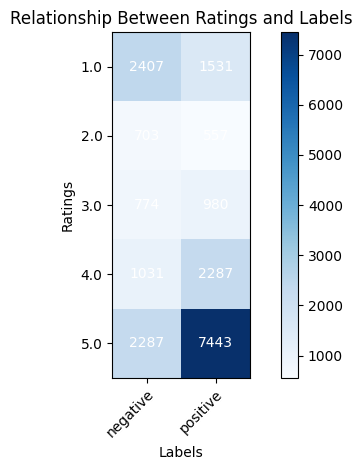

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'ratings' and 'labels' columns

# Count the occurrences of each label for each rating
label_counts = df.groupby('overall')['label'].value_counts().unstack(fill_value=0)

# Create the chart
fig, ax = plt.subplots()
im = ax.imshow(label_counts, cmap='Blues')

# Set the labels and ticks
ax.set_xticks(range(len(label_counts.columns)))
ax.set_yticks(range(len(label_counts.index)))
ax.set_xticklabels(label_counts.columns)
ax.set_yticklabels(label_counts.index)

# Rotate the x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add a title and axis labels
ax.set_title("Relationship Between Ratings and Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Ratings")

# Loop over the data and add text annotations
for i in range(len(label_counts.index)):
    for j in range(len(label_counts.columns)):
        text = ax.text(j, i, label_counts.iloc[i, j], ha="center", va="center", color="w")

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame named 'df' containing the features, 'review' label, and 'category' column
# Make sure the DataFrame has the following columns: 'price', 'rating', 'Licensing_Fee',
# 'Implementation_cost', 'Maintenance_cost', 'review', and 'category'

# Calculate item similarities using cosine similarity
item_features = df[['price', 'rating', 'Licensing_Fee', 'Implemention_cost', 'Maintenance_cost']]
similarity_matrix = cosine_similarity(item_features)

# Assuming 'user_preferences' is a dictionary containing the user's preferences
user_preferences = {
    'price': 25,
    'rating': 4.2,
    'Licensing_Fee': ,
    'Implementation_cost': 3000,
    'Maintenance_cost': 1400
}

# Convert user preferences into a DataFrame for similarity calculation
user_features = pd.DataFrame(user_preferences, index=[0])
user_features = user_features[item_features.columns]

# Calculate the similarity between user preferences and item features
user_similarities = cosine_similarity(user_features, item_features)

# Assuming 'user_review' is the user's review preference (positive or negative)
user_review = 'positive'

# Filter items with the user's review preference
positive_items = df[df['review'] == user_review]

# Assuming 'user_category' is the user's preferred product category
user_category = 'Business & Office'  # Replace with the actual user's preferred category

# Filter items with the user's preferred category
category_items = positive_items[positive_items['category'] == user_category]

# Calculate the weighted average of similarities and ratings for the category items
weighted_ratings = user_similarities.dot(category_items['rating']) / user_similarities.sum()
recommendations = weighted_ratings.argsort()[::-1]  # Sort recommendations in descending order

# Print the recommended items
print("Recommended Items:")
for item in recommendations:
    print("Item:", item)
    print("Price:", df['price'][item])
    print("Rating:", df['rating'][item])
    print("Licensing Fee:", df['Licensing_Fee'][item])
    print("Implementation Cost:", df['Implementation_cost'][item])
    print("Maintenance Cost:", df['Maintenance_cost'][item])
    print("Category:", df['category'][item])
    print("--------------")


In [23]:
# Assuming you have a DataFrame named 'df' with columns 'column_name' and 'value'

# Select rows where 'column_name' contains the specific 'value'
selected_data = df[df['software_category'] == "Business & Office"]

# Print the selected data
selected_data.shape

(11957, 23)

In [24]:
df=selected_data.head(10000)

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame named 'df' containing the features, 'review' label, and 'category' column
# Make sure the DataFrame has the following columns: 'price', 'rating', 'Licensing_Fee',
# 'Implementation_cost', 'Maintenance_cost', 'review', and 'category'

# Calculate item similarities using cosine similarity
item_features = df[['price', 'overall', 'Licensing_Fee', 'Implemention_cost', 'Maintenance_cost']]
similarity_matrix = cosine_similarity(item_features)

# Define the user preferences range for price and costs
user_preferences_range = {
    'price': (20, 50),  # Range for price: from 20 to 30
    'overall': (2.0, 5.0),  # Range for rating: from 4.0 to 5.0
    'Licensing_Fee': (0, 10),  # Range for Licensing Fee: from 500 to 700
    'Implemention_cost': (1, 100),  # Range for Implementation Cost: from 2000 to 4000
    'Maintenance_cost': (0, 15),  # Range for Maintenance Cost: from 1000 to 1500
}
# Generate random user preferences within the defined range
import random
user_preferences = {
    feature: random.uniform(user_preferences_range[feature][0], user_preferences_range[feature][1])
    for feature in user_preferences_range
}

# Convert user preferences into a DataFrame for similarity calculation
user_features = pd.DataFrame(user_preferences, index=[0])
user_features = user_features[item_features.columns]

# Calculate the similarity between user preferences and item features
user_similarities = cosine_similarity(user_features, item_features)

# Assuming 'user_review' is the user's review preference ('positive', 'negative', or 'all')
user_review = 'positive'  # Replace with the actual user's review preference

# Filter items based on the review label
if user_review == 'all':
    filtered_items = df  # Consider all items
else:
    filtered_items = df[df['label'] == user_review]  # Consider only items with the specified review label

# Calculate the similarity between user preferences and filtered item features
user_similarities = cosine_similarity(user_features, filtered_items[['price', 'overall', 'Licensing_Fee', 'Implemention_cost', 'Maintenance_cost']])

# Calculate the weighted average of similarities and ratings for the items
weighted_ratings = user_similarities.dot(filtered_items['overall']) / abs(user_similarities).sum()

# Get the indices of the sorted recommendations based on weighted ratings
recommendations = weighted_ratings.argsort()[::-1]

# Sort the filtered_items DataFrame based on price and costs
sorted_items = filtered_items.iloc[recommendations].sort_values(['price', 'Licensing_Fee', 'Implemention_cost', 'Maintenance_cost'])

# Print the sorted recommended items
print("Recommended Items:")
for idx, item in sorted_items.head(5).iterrows():
    print("Item:", idx)
    print("Price:", item['price'])
    print("Rating:", item['overall'])
    print("Licensing Fee:", item['Licensing_Fee'])
    print("Implementation Cost:", item['Implemention_cost'])
    print("Maintenance Cost:", item['Maintenance_cost'])
  

Recommended Items:
Item: 8043
Price: 18.0
Rating: 5.0
Licensing Fee: 0.008
Implementation Cost: 9.0
Maintenance Cost: 1.8


In [33]:
#Applying text cleaning function to each row
df['title'] = df['title'].apply(lambda text: text_cleaning(text))

#Printing line at Index 10000
df['title'].iloc[100]

'office suite special edition windows 10 8 7 vista xp pc software 1 000 new fonts alternative microsoft office compatible word excel powerpoint'

In [28]:
#Applying text cleaning function to each row
df['ensemble'] = df['ensemble'].apply(lambda text: text_cleaning(text))

#Printing line at Index 10000
df['ensemble'].iloc[1000]

/tmp/ipykernel_326019/224004157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ensemble'] = df['ensemble'].apply(lambda text: text_cleaning(text))


'anytime organizer deluxe 10 old version years dozens personal organizers helped manage calendar lists contacts anytime organizer product kind combine powerful tools need stay organized simple familiar interface hundreds printable calendars expense reports synchronization handheld devices downloadable add ins anytime adds organization enjoyment daily life years personal organizers helped manage calendar lists contacts anytime organizer product kind combine powerful tools need stay organized simple familiar interface hundreds printable calendars expense reports synchronization handheld device downloadable add ins anytime adds organization enjoyment daily life b features b day planner calendar br schedule appointments events calls meetings organize busy schedule simply drag drop information reschedule week month year view lists tasks br prioritize manage list set due dates sort priority check tasks completed unfinished tasks automatically roll next day address book contact manager br sta

In [29]:
#Selecting first 35000 rows
df = df.head(35000)

#creating count_vect object
count_vect = CountVectorizer()

#Create Matrix
count_matrix = count_vect.fit_transform(df['ensemble'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [40]:
indices = pd.Series(df.index, index=df['title']).to_dict()

In [41]:
# Function that takes in product title as input and gives recommendations
def content_recommender(title, cosine_sim=cosine_sim, df=df,
indices=indices):
        
    # Obtain the index of the product that matches the title
    idx = indices[title]
        
    # Get the pairwsie similarity scores of all products with that product
    # And convert it into a list of tuples as described above
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the products based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
    # Get the scores of the 30 most similar products. Ignore the first product.
    sim_scores = sim_scores[1:30]
        
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
        
    # Return the top 30 most similar products
    return df['title'].iloc[product_indices]

In [42]:
#Define the product we want to recommend other items from
product_title = 'office suite special edition windows 10 8 7 vista xp pc software 1 000 new fonts alternative microsoft office compatible word excel powerpoint'

#Launching the content_recommender function
recommendations = content_recommender(product_title)

#Associating titles to recommendations
asin_recommendations = df[df['title'].isin(recommendations)]

#Merging datasets
recommendations = pd.merge(recommendations, 
                           asin_recommendations, 
                           on='title', 
                           how='left')

#Showing top 5 recommended products
recommendations['title'].head()

0    excel 2010 training videos ndash 14 hours exce...
1    excel 2010 training videos ndash 14 hours exce...
2    excel 2010 training videos ndash 14 hours exce...
3    excel 2010 training videos ndash 14 hours exce...
4    excel 2010 training videos ndash 14 hours exce...
Name: title, dtype: object